# Data

Parse JSON

In [1]:
# add the parent directory to Python path
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

# load test json in jupyter notebook
import json
with open("./small_dataset.json") as f:
    dic = json.load(f)
    dic = dic["data"] # when run Launcher.ipynb, comment this out

# Parse data into assets and
from utils import json_parse
price_df, esg_s, asset_arr = json_parse(dic)

Preprocess μ and Σ

In [2]:
# Calculates mu and sigma using OAS, LedoitWolf or normal cov
from utils import compute_mu_sigma
mu, Sigma = compute_mu_sigma(price_df, lookback=252, shrinkage=True)

/home/jovyan/work/git/singapore25_challenge3_team9/et/../utils/Pre_processing.py:28: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = prices_df.pct_change().dropna() # percentage change between the current element and prior element


Helper function

In [3]:
def print_result(result):
    selection = result.x
    value = result.fval
    print("Optimal: selection {}, value {:.4f}".format(selection, value))

    eigenstate = result.min_eigen_solver_result.eigenstate
    probabilities = (
        eigenstate.binary_probabilities()
        if isinstance(eigenstate, QuasiDistribution)
        else {k: np.abs(v) ** 2 for k, v in eigenstate.to_dict().items()}
    )
    print("\n----------------- Full result ---------------------")
    print("selection\tvalue\t\tprobability")
    print("---------------------------------------------------")
    probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)

    for k, v in probabilities:
        x = np.array([int(i) for i in list(reversed(k))])
        value = portfolio.to_quadratic_program().objective.evaluate(x)
        print("%10s\t%.4f\t\t%.4f" % (x, value, v))

# Imports

In [6]:
# # Find all corrupted package directories
# !find /opt/conda/lib/python3.12/site-packages/ -name "*~*" -type d

# # Remove ALL corrupted package directories
# !find /opt/conda/lib/python3.12/site-packages/ -name "*~*" -type d -exec rm -rf {} +

/opt/conda/lib/python3.12/site-packages/~iskit_algorithms-0.4.0.dist-info
/opt/conda/lib/python3.12/site-packages/~iskit_algorithms


In [40]:
# !pip uninstall qiskit qiskit-finance qiskit-aer qiskit-algorithms qiskit-optimization -y

Found existing installation: qiskit 2.2.2
Uninstalling qiskit-2.2.2:
  Successfully uninstalled qiskit-2.2.2
Found existing installation: qiskit-finance 0.4.1
Uninstalling qiskit-finance-0.4.1:
  Successfully uninstalled qiskit-finance-0.4.1
Found existing installation: qiskit-aer 0.13.3
Uninstalling qiskit-aer-0.13.3:
  Successfully uninstalled qiskit-aer-0.13.3
Found existing installation: qiskit-algorithms 0.3.0
Uninstalling qiskit-algorithms-0.3.0:
  Successfully uninstalled qiskit-algorithms-0.3.0
Found existing installation: qiskit-optimization 0.6.1
Uninstalling qiskit-optimization-0.6.1:
  Successfully uninstalled qiskit-optimization-0.6.1


In [45]:
# !pip install qiskit-aer
# !pip install qiskit
# !pip install qiskit-algorithms
# !pip install qiskit-optimization
# !pip install qiskit-finance

# !pip install qiskit==1.0.1
# !pip install qiskit-finance==0.4.1
# !pip install qiskit-aer==0.13.3
# !pip install qiskit-algorithms==0.3.0
# !pip install qiskit-optimization==0.6.1

  Using cached qiskit-1.0.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-1.0.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.2.2
    Uninstalling qiskit-2.2.2:
      Successfully uninstalled qiskit-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytket-qiskit 0.72.0 requires qiskit>=2.2.0, but you have qiskit 1.0.1 which is incompatible.
pytket-qiskit 0.72.0 requires qiskit-aer>=0.17.1, but you have qiskit-aer 0.13.3 which is incompatible.
qiskit-ibm-runtime 0.43.1 requires qiskit>=1.4.1, but you have qiskit 1.0.1 which is incompatible.


In [11]:
from qiskit.circuit.library import TwoLocal
from qiskit.result import QuasiDistribution
from qiskit_aer.primitives import Sampler
from qiskit_algorithms import NumPyMinimumEigensolver, QAOA, SamplingVQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer
import numpy as np
import matplotlib.pyplot as plt
import datetime

# QAOA solver

Using QAOA solver we are constarained to have our weightage $w\in\{0,1\}$.

$$
\min_{x\in\{0,1\}^n} qx^T\sum x - \mu^Tx
$$
This is subject to budget constaint:
$$
1^Tx=B\quad\text{(number of assests to be selected out of $n$)}
$$
The penalty term is therefore:
$$
P=\left(1^Tx-B\right)^2
$$

In [5]:
mu

array([ 0.42915223, -0.00061248,  0.2488161 , -0.18383924,  0.37047636,
       -0.13928066,  0.555738  , -0.04417867,  0.23206483,  0.24347881,
        0.18823072, -0.36284643,  0.08721291])

In [6]:
Sigma[0]

array([0.05786137, 0.00443588, 0.00432483, 0.00303712, 0.00247026,
       0.02252526, 0.02857737, 0.02435392, 0.02677308, 0.0074278 ,
       0.0037386 , 0.02685139, 0.01430263])

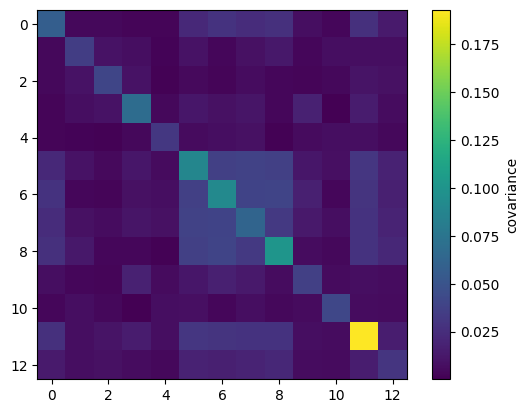

In [7]:
plt.imshow(Sigma, interpolation="nearest")
plt.colorbar(label="covariance")
plt.show()

In [18]:
# Create optimization equation
num_assets = len(mu)
q = 1  # set risk factor
budget = num_assets // 2  # set budget
penalty = min(num_assets, 1000)  # Cap the penalty (this is good assumption generally_


portfolio = PortfolioOptimization(expected_returns=mu, covariances=Sigma, risk_factor=q, budget=budget, )
qp = portfolio.to_quadratic_program()
qp

TypeError: Can't instantiate abstract class PortfolioOptimization without an implementation for abstract methods 'interpret', 'to_quadratic_program'

# Classical Eigensolver

In [9]:
exact_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(exact_mes)

result = exact_eigensolver.solve(qp)

print_result(result)

Optimal: selection [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.], value -1.7830

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 0 1 0 1 0 1 0 0 1 1 0 0]	-1.7830		1.0000


# Using QAOA

In [10]:
# from qiskit.algorithms import algorithm_globals
# algorithm_globals.random_seed = 1234

cobyla = COBYLA()
cobyla.set_options(maxiter=250)
qaoa_mes = QAOA(sampler=Sampler(), optimizer=cobyla, reps=3)
qaoa = MinimumEigenOptimizer(qaoa_mes)
result = qaoa.solve(qp)

print_result(result)

Optimal: selection [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.], value -1.6611

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 0 0 0 0 0 0 1 0 1 1 1]	0.1723		0.0244
[0 1 1 0 0 0 0 0 1 1 1 1 1]	-0.2144		0.0205
[0 1 0 0 0 0 0 0 1 1 0 1 1]	0.1142		0.0176
[0 1 0 0 0 0 0 0 1 0 0 1 1]	0.3161		0.0156
[0 1 0 0 0 0 0 0 1 1 1 1 1]	-0.0241		0.0146
[0 1 0 0 0 0 0 1 1 0 0 1 1]	0.4796		0.0127
[0 1 0 1 1 1 1 1 0 0 0 0 0]	-0.1675		0.0117
[0 0 0 0 0 0 0 0 1 1 1 1 1]	-0.0797		0.0107
[1 1 0 1 1 1 1 1 0 0 0 0 0]	-0.4824		0.0098
[0 1 0 0 0 0 0 1 1 0 1 1 1]	0.3428		0.0098
[0 1 1 0 0 0 0 0 1 0 1 1 1]	-0.0207		0.0098
[0 1 1 0 0 0 0 1 1 0 0 1 1]	0.2890		0.0088
[0 1 0 0 0 0 0 1 1 1 1 1 1]	0.1596		0.0088
[1 0 0 1 1 1 0 1 0 0 0 0 0]	-0.1457		0.0088
[1 0 0 1 0 1 1 1 0 0 0 0 0]	-0.2100		0.0078
[0 0 0 1 1 1 1 1 0 0 0 0 0]	-0.2165		0.0068
[1 1 1 0 0 0 0 0 1 1 1 1 1]	-0.5268		0.0068
[0 1 0 0 0 0 0 1 1 0 0 0 1]	-0.0590		0.0068
[1 0 0

risk or credit score metric